#Bibliotecas:



In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

**NumPy:** NumPy é uma biblioteca para a linguagem de programação Python, que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes.(**Medium**, 2018)

**Pandas:** Pandas é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados.(**w3schools**,?)

**Matplotlib:** Matplotlib é uma biblioteca de software para criação de gráficos e visualizações de dados em geral.(**Medium**, 2018)

**Seaborn:** A biblioteca Seaborn atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada.(**Medium**,2019)

**Statistics:** Módulo que fornece funções para o cálculo de estatísticas matemáticas de dados numéricos (para valores do tipo Real).(**Python**)

**Counter:** Este módulo implementa tipos de dados de contêiner especializados, fornecendo alternativas aos contêineres integrados de uso geral do Python(**Python**)



#Importação dos dados:


In [ ]:

dados = pd.read_csv('files/ocorrencias_cenipa.csv')

A biblioteca **pandas** é capaz de ler arquivos do tipo csv, xml, json e outros.

##Incidentes:

No grafico abaixo pode-se perceber que a maioria são incidentes não graves.
sendo 55.1% incidentes, 32.3 são acidentes e apenas 12.6 dos incidentes são graves.

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


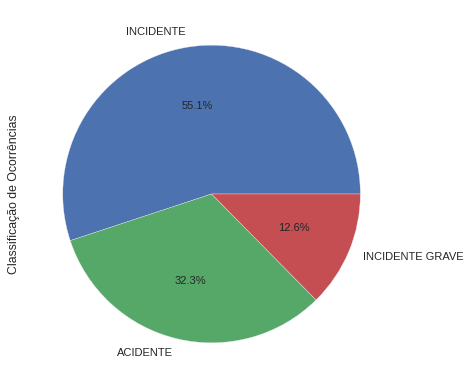

In [ ]:
plt.style.use("seaborn")

dados['tipo'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Classificação de Ocorrências" ,figsize=(6, 6))
plt.show()

### Codigo abaixo é para dividir as regiões.

In [ ]:

dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

# Acidentes por Região

No grafico nota-se que o maior indice de acidentes esta localizado na região sudeste do país e a região com o menor número de acidentes fica no nordeste.

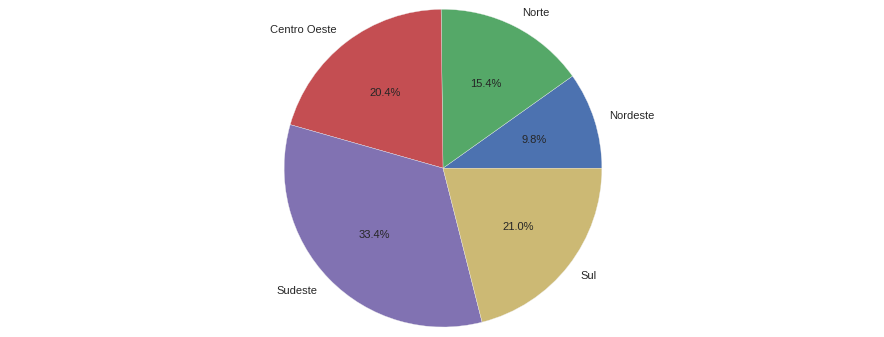

In [ ]:
plt.style.use("seaborn")
fig1, ax1 = plt.subplots(figsize=(14,5))
r1 = np.arange(5)
ax1.pie(dados_regioes['ACIDENTE'], labels = dados_regioes['Região'], autopct='%1.1f%%')
ax1.axis('equal')
plt.show()




# Incidentes por Região

A região com maior número de incidente é a Sudeste, a região com o menor indíce de incidentes é o centro oeste seguido por nordeste e norte.

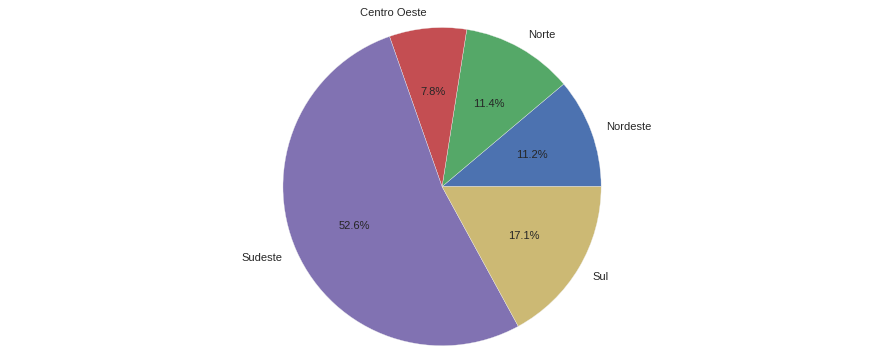

In [ ]:
plt.style.use("seaborn")
fig1, ax1 = plt.subplots(figsize=(14,5))
r1 = np.arange(5)
ax1.pie(dados_regioes['INCIDENTE'], labels = dados_regioes['Região'], autopct='%1.1f%%')
ax1.axis('equal')
plt.show()




# Incidentes Graves por região.

A região com o maior número de incidentes graves é o sudeste com 38.1%, e o menor é o nordeste com 13.0%, seguido por Norte com 14.4%, Centro oeste com 17.2% e sul com 17.3%.

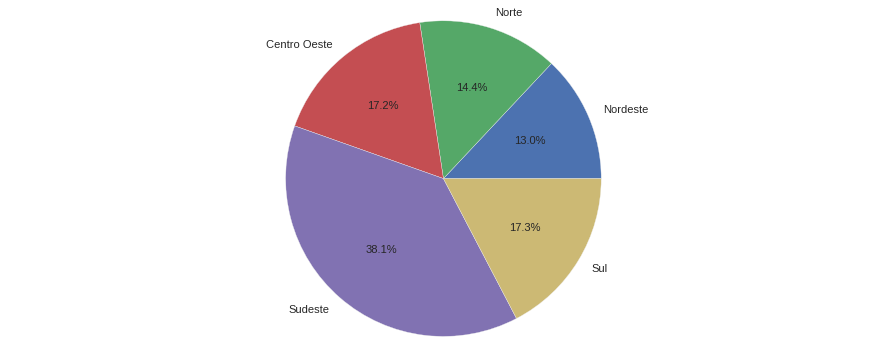

In [ ]:
plt.style.use("seaborn")
fig1, ax1 = plt.subplots(figsize=(14,5))
r1 = np.arange(5)
ax1.pie(dados_regioes['INCIDENTE GRAVE'], labels = dados_regioes['Região'], autopct='%1.1f%%')
ax1.axis('equal')
plt.show()




# Ocorrências por estado

O estado com o maior numéro de ocorrências é São paulo sendo quase 3 vezes maior o numéro se comparado ao estado de Minas gerais, e o estado com a menor quantidade de ocorrências é o amapá

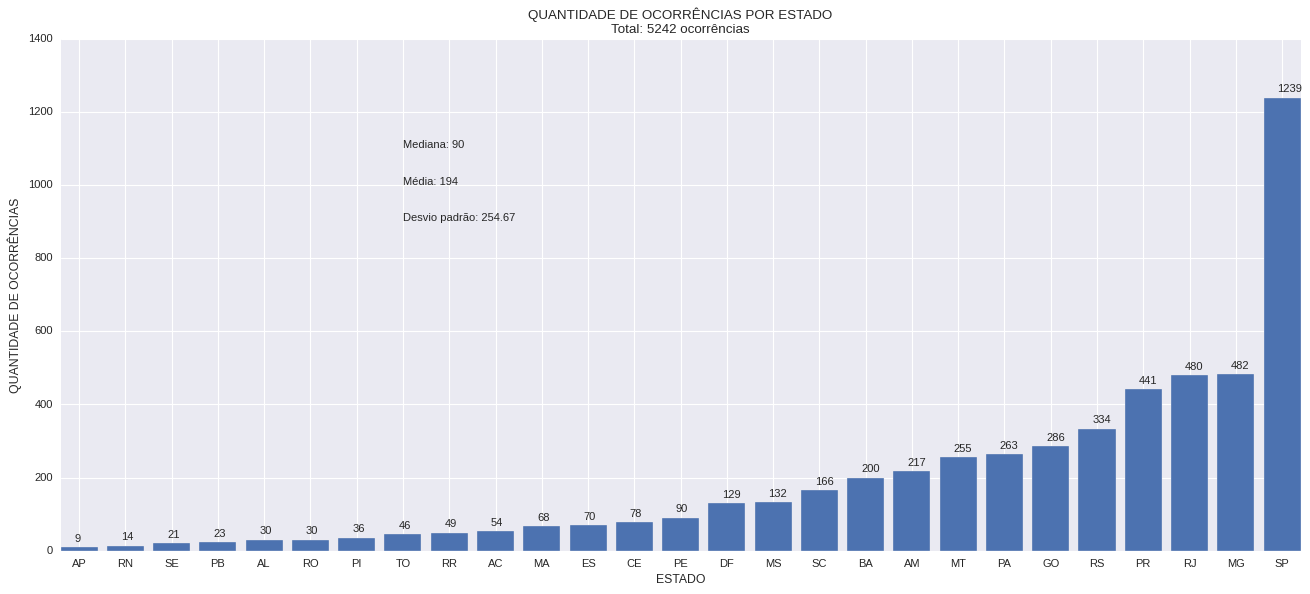

In [ ]:
plt.style.use("seaborn")
estado = Counter(dados['estado'])
org_estado = sorted(estado, key = estado.get)
cont_estado = sorted(list(estado.values()))
totalEstado= sum(cont_estado)
fig,ax = plt.subplots(figsize=(20, 8))

rects1=ax.bar(org_estado, cont_estado)

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal: ' + str(totalEstado) + ' ocorrências')
plt.xticks(rotation=0)

plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(cont_estado))))
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(cont_estado))))
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(cont_estado))) 

plt.show()

# Tipo de aeronave por ocorrência

No grafico se percebe que avião é disparado o tipo de aeronave com a maior quantidade de ocorrências. 

In [ ]:

aeronave_tipo = Counter(dados['aeronave_tipo'])


tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)


contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)


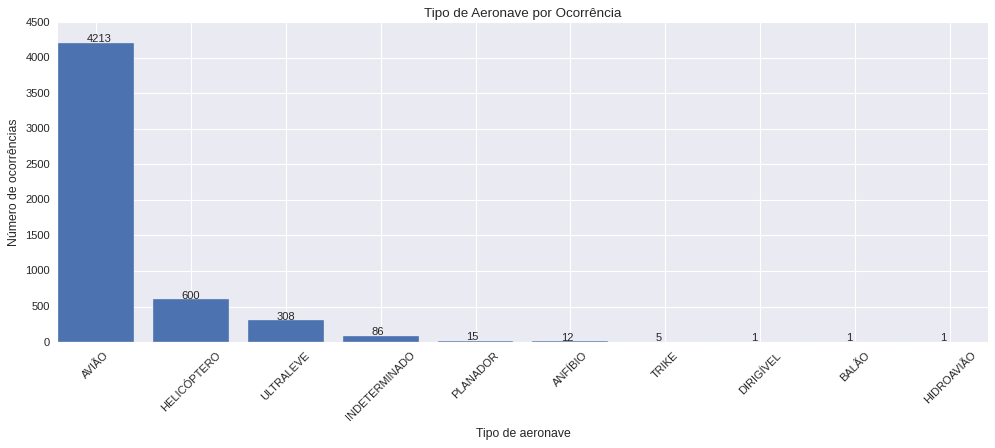

In [ ]:


plt.style.use("seaborn")

fig,ax = plt.subplots(figsize=(15, 5))

x=contador_tipo
y=tipo

rects1=ax.bar(y, x)

plt.xlabel('Tipo de aeronave')
plt.ylabel("Número de ocorrências")
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
plt.xticks(rotation=45)
plt.title('Tipo de Aeronave por Ocorrência')

plt.show()


# Ocorrências por tipo do motor

Observando este grafico nota-se que o motor que mais ocorre falhas é o pistão.
A média de ocorrências é 873

In [ ]:
motor_tipo = Counter(dados['motor_tipo'])


tipoMotor = sorted(motor_tipo, key = motor_tipo.get, reverse = True)


contador_tipoMotor = sorted(list(motor_tipo.values()), reverse = True)

fig,ax = plt.subplots(figsize=(15, 5))

x = tipoMotor
y = contador_tipoMotor

rects1=ax.bar(x, y)


for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal:' + str(totalEstado) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.text(4, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_tipoMotor))))
plt.text(4, 1000.9, 'Média: %d'%(np.mean(np.array(contador_tipoMotor))))
plt.text(4, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_tipoMotor))) 
plt.xticks(rotation=0)
plt.show()

NameError: ignored

# Regressão linear
No primeiro grafico:
Pode se perceber quanto mais nova a aeronave menor a necessidade de mais motores para levar mais passageiros.

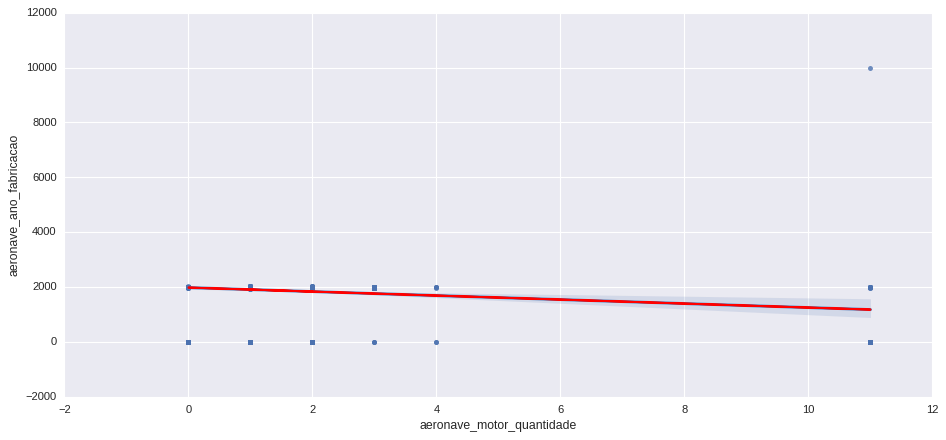

In [ ]:
#dados['aeronave_motor_quantidade'] = dados['aeronave_motor_quantidade'].apply(lambda x: x.replace('MONOMOTOR', '1.0').replace('BIMOTOR', '2.0').replace('TRIMOTOR', '3.0').replace('QUADRIMOTOR', '4.0').replace('SEM TRAÇÃO', '0.0').replace('INDETERMINADO', '0.0'))
dados['aeronave_motor_quantidade'] = dados['aeronave_motor_quantidade'].astype(float)


dataframe = pd.DataFrame()
dataframe['y'] = dados['aeronave_ano_fabricacao']
dataframe['x'] = dados['aeronave_motor_quantidade']
x_values = dataframe[['x']]
y_values = dataframe[['y']]


plt.figure(figsize=(14,6))


sns.regplot(y='aeronave_ano_fabricacao', x='aeronave_motor_quantidade', data=dados)


fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

Neste grafico se confirma a afirmação acima mostrando que aeronaves com 2 motores conseguem carregar muitos passageiros.

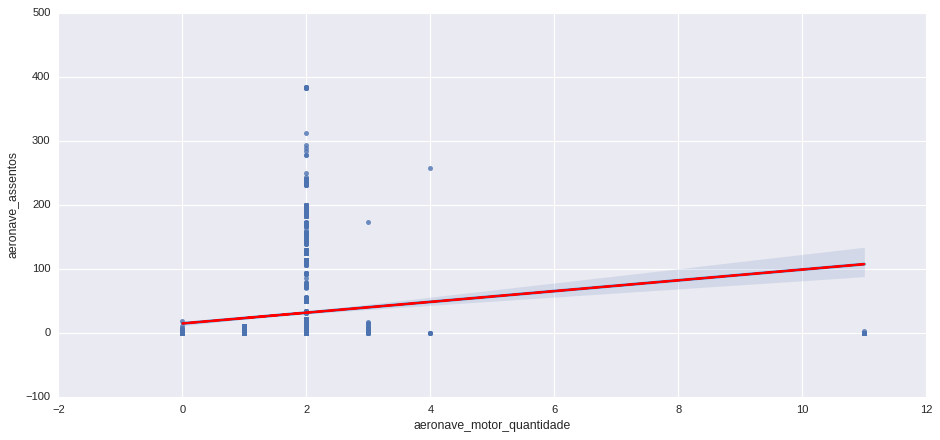

In [ ]:
# Criação do DataFrame
#dados['aeronave_motor_quantidade'] = dados['aeronave_motor_quantidade'].apply(lambda x: x.replace('MONOMOTOR', '1.0').replace('BIMOTOR', '2.0').replace('TRIMOTOR', '3.0').replace('QUADRIMOTOR', '4.0').replace('SEM TRAÇÃO', '0.0').replace('INDETERMINADO', '5.0'))
dados['aeronave_motor_quantidade'] = dados['aeronave_motor_quantidade'].astype(float)



dataframe = pd.DataFrame()
dataframe['x'] = dados['aeronave_motor_quantidade']
dataframe['y'] = dados['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]



plt.figure(figsize=(14,6))

#plt.scatter(dataframe['x'].values, dataframe['y'].values)
sns.regplot(x='aeronave_motor_quantidade', y='aeronave_assentos', data=dados)



fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

#Relatório final
Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena.


Neste Projeto foi analisado os dados do cenipa buscando mostrar de forma gráfica informações a respeito das ocorrências de 2010 a 2019.

Os principais pontos abordados nessa análisa foi o número de ocorrências por região, como incidentes, acidentes e incidentes graves, tipos de motores e a quantidade necessária de motores para um número elevado de passageiros.

Foi notado durante a análise que o motor que causa o maior número de ocorrências é o pistão com 2952 ocorrências.

Por fim nesta análise também se descobre que os aviões com 2 motores são os que mais carregam passageiros, pois com o avanço da tecnologia se torna desnecessario o uso de mais motores.

Concluimos que a região com o maior número de ocorrências é o sudeste em todos os gráficos há uma grande diferença no número de ocorrências devido a isso o estado com o maior indíce de ocorrências é **São Paulo**, sendo o número quase 3 vezes maior que o estado de Minas também é algo de se esperar pois o estado de São Paulo é o centro da aviação no Brasil com o maior número de pousos e decolagens diários.

# Referências bibliográficas

CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira

PYTHON. Collections — Tipos de dados do contêiner. [S.I.], [?] ,Disponível em: https://docs.python.org/3/library/collections.html.

Python. Statistics, Disponivel em: https://docs.python.org/pt-br/3/library/statistics.html

Gráficos de barra com matplotlib, Medium, 2018:https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

Visualização de dados com Seaborn, Medium, 2019: https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb

Biblioteca pandas, w3school, disponivel em: https://www.w3schools.com/python/pandas/default.asp